In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [ ]:
df=pd.read_csv('customers.csv')

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df.shape

(10695, 11)

In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
df_cleaned=df.dropna(axis=0)

In [ ]:
df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df_cleaned.shape

(8819, 11)

In [ ]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
df_cleaned['Family_Size'].unique()

array([4., 1., 2., 3., 5., 6., 8., 7., 9.])

In [ ]:
df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [ ]:
customer1=df_cleaned.copy()

In [ ]:
customer1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customer1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [ ]:
customer1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
le=LabelEncoder()

In [ ]:
customer1['Segmentation']=le.fit_transform(customer1['Segmentation'])

In [ ]:
customer1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [ ]:
customer1=customer1.drop('ID',axis=1)
customer1=customer1.drop('Var_1',axis=1)

In [ ]:
customer1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
customer1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [ ]:
customer1['Segmentation'].unique()

array([3, 1, 2, 0])

In [ ]:
X=customer1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [ ]:
y1 = customer1[['Segmentation']].values

In [ ]:
one_hot_enc=OneHotEncoder()

In [ ]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [ ]:
y1.shape

(8819, 1)

In [ ]:
y = one_hot_enc.transform(y1).toarray()

In [ ]:
y.shape

(8819, 4)

In [ ]:
y1[0]

array([3])

In [ ]:
y[0]

array([0., 0., 0., 1.])

In [ ]:
X.shape

(8819, 8)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [ ]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [ ]:
X_train.shape

(5908, 8)

In [ ]:
scaler_age = MinMaxScaler()

In [ ]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [ ]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [ ]:
ai_brain = Sequential([
  Dense(4,input_shape=(8,)),
  Dense(8,activation='relu'),
  Dense(8,activation='relu'),
  Dense(4,activation='softmax'),
])

In [ ]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs= 2000,
             batch_size= 256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
24/24 [==============================] - 1s 13ms/step - loss: 2.2934 - accuracy: 0.2256 - val_loss: 1.9993 - val_accuracy: 0.2319
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.7754 - accuracy: 0.2400 - val_loss: 1.6514 - val_accuracy: 0.2442
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.5472 - accuracy: 0.2715 - val_loss: 1.4987 - val_accuracy: 0.2748
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4509 - accuracy: 0.2889 - val_loss: 1.4378 - val_accuracy: 0.2800
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4118 - accuracy: 0.2845 - val_loss: 1.4094 - val_accuracy: 0.2783
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3907 - accuracy: 0.2854 - val_loss: 1.3928 - val_accuracy: 0.2930
Epoch 7/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3768 - accuracy: 0.3053 - val_loss: 1.3809 - val_accuracy: 0.3136
Epoch

In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,2.293390,0.225626,1.999275,0.231879
1,1.775442,0.240014,1.651432,0.244246
2,1.547215,0.271496,1.498734,0.274820
3,1.450881,0.288930,1.437814,0.279973
4,1.411842,0.284529,1.409424,0.278255


<Axes: >

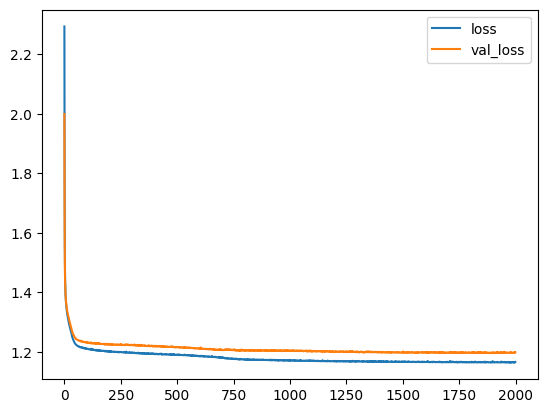

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 1s 5ms/step


In [ ]:
x_test_predictions.shape

(2911,)

In [ ]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [ ]:
y_test_truevalue.shape

(2911,)

In [ ]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[376  94 112 175]
 [245 127 216  98]
 [157  72 367  90]
 [203  43  52 484]]


In [ ]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43       757
           1       0.38      0.19      0.25       686
           2       0.49      0.53      0.51       686
           3       0.57      0.62      0.59       782

    accuracy                           0.47      2911
   macro avg       0.46      0.46      0.45      2911
weighted avg       0.46      0.47      0.45      2911



In [ ]:
ai_brain.save('customer_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customer1,df_cleaned,scaler_age,enc,one_hot_enc,le],fh)

In [ ]:
ai_brain = load_model('customer_classification_model.h5')

In [ ]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 148ms/step


In [ ]:
print(x_single_prediction)

[2]


In [ ]:
print(le.inverse_transform(x_single_prediction))

['C']
